1 - Para o problema do decaimento radiativo

Modifique o código para proximar a derivada contínua $d N/ d t$ pela derivada numérica central. Assumindo $\tau = 1$, compare a solução teórica com as soluções numéricas via derivada progressiva e derivada central. Mostre o resultado para diferentes valores de $\Delta t = 0.01, 0.02, 0.04, 0.06, 0.08,0.10$ em um intervalo de tempo $t \in [0,5]$.

Escreva um código para plotar o erro $\Delta_i =  |N_{num}(t_i) - N_{teo}(t_i)|$ e determine o erro integrado $\Delta_{tot} = \sum_i \Delta_i$ para cada uma das duas aproximações de derivada numérica

Compare o erro entre as duas aproximações de derivadas numéricas com um gráfico $\Delta_{tot}~\times~\Delta t$

500


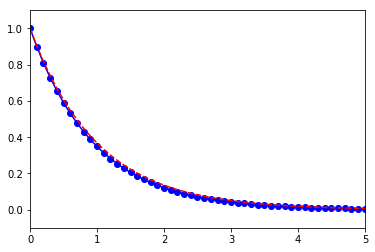

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def fdecay(t,N0,tau):
    return N0*np.exp(-t/tau)

dt = 0.1          
nt = 500          
tau = 1           
N0 = 1           
Tmax = (nt-1)*dt  
time = np.arange(0, Tmax, dt)
decay = np.zeros(nt)
decay[0] = N0
theory = fdecay(time,N0,tau) 

for i in range(1,nt):
     decay[i] = decay[i-1]*(1-dt/tau)
    
plt.plot(time, decay, '-bo',time,theory,'r--')
plt.axis([0, 5*tau, -0.1, 1.1])
plt.show()



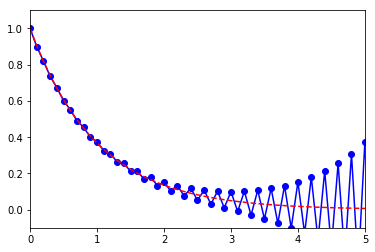

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def fdecay(t,N0,tau):
    return N0*np.exp(-t/tau)

dt = 0.1          
nt = 500          
tau = 1           
N0 = 1           
Tmax = (nt-1)*dt  
time = np.arange(0, Tmax, dt)
decay = np.zeros(nt)
decay[0] = N0
decay[1] = N0*(1-dt/tau)
theory = fdecay(time,N0,tau) 

for i in range(2,nt):
     decay[i] = decay[i-2] - (2*dt*decay[i-1])/tau
        
plt.plot(time, decay, '-bo',time,theory,'r--')
plt.axis([0, 5*tau, -0.1, 1.1])
plt.show()

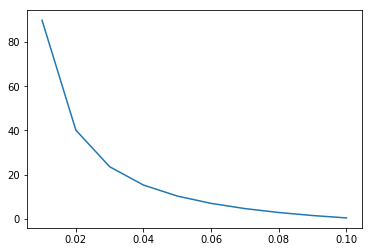

In [15]:
import matplotlib.pyplot as plt
import numpy as np


def fdecay(t,n0,tau):     #Onde t é um vetor.
    return n0*np.exp(-t/tau)

def f_num_p(t,n0,tau):   #Onde t é um vetor.
    nt=len(t)
    decay = np.zeros(nt)
    decay[0] = n0
    for i in range(1,nt):
         decay[i] = decay[i-1]*(1-dt/tau)
    return decay

def f_num_c(t,n0,tau):   #Onde t é um vetor.
    nt=len(t)
    decay = np.zeros(nt)
    decay[0] = n0
    decay[1] = n0*(1-dt/tau)
    for i in range(2,nt):
        decay[i] = decay[i-2] - (2*dt*decay[i-1])/tau
    return decay


def erro_a_p(t0,tf,dt,n0,tau): #Onde todos são escalares.
    t= np.arange(t0, tf, dt)
    nt=len(t)
    ndecay= f_num_p(t,n0,tau)
    adecay=fdecay(t,n0,tau)
    errop=np.abs(ndecay-adecay)
    erroabs=errop[0]
    for i in range (1,nt):
        erroabs+=errop[i]
    return erroabs

def erp_acm_de_dt(t0,tf,n0,tau,dti,dtf,ndt):
    vdt=np.linspace(dti,dtf,ndt) #vetor de dts
    
    verroabs=np.zeros(ndt)        #vetor erro absoluto referente ao dt do 
                                 #vetor vdt
    for i in range (0,ndt):
        verroabs[i]=erro_a_p(t0,tf,vdt[i],n0,tau)
    return verroabs

#Variáveis da questão
tau=1; t0=0 ; tf=5*tau; n0=1; dti=0.01; dtf=0.10; ndt=10

vdt=np.linspace(dti,dtf,ndt)
erroacmp=erp_acm_de_dt_de_dt(t0,tf,n0,tau,dti,dtf,ndt)
plt.plot(vdt,erroacmp)
plt.show()